Niyousha Mohammadshafie<br>
Video link: https://www.youtube.com/watch?v=dyCRvxxGdpI&ab_channel=NiyoushaMshafie

In [21]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#loading the dataset
df = pd.read_csv('yrbsdata.csv')

In [23]:
df.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,KY,Kentucky (KY),State,2,2007,9,51.6402,28,2,648526,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,KY,Kentucky (KY),State,2,2007,9,104.2187,18,2,648527,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,KY,Kentucky (KY),State,2,2007,9,33.2209,6,2,648528,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,KY,Kentucky (KY),State,2,2007,9,29.7973,29,2,648529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KY,Kentucky (KY),State,2,2007,9,29.8429,8,1,648530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962925 entries, 0 to 962924
Columns: 150 entries, sitecode to qtransgender
dtypes: float64(141), int64(6), object(3)
memory usage: 1.1+ GB


In [25]:
df.describe()

,sitetypenum,year,survyear,weight,stratum,PSU,record,age,sex,grade,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
count,962925.0,962925.000000,962925.000000,962925.000000,962925.000000,962925.000000,9.629250e+05,959611.000000,957244.000000,951473.000000,...,89563.000000,352802.000000,83896.000000,101867.000000,6017.000000,8272.000000,280714.000000,61823.000000,0.0,24938.000000
mean,2.0,2007.295385,9.147693,75.713347,17.623459,2.426024,7.770160e+05,4.953151,1.489968,2.356736,...,1.515012,3.761206,1.954336,1.280356,2.663121,1.761726,1.716195,1.148133,NaN,1.123787
std,0.0,7.504626,3.752313,103.431239,17.405085,3.528825,4.393087e+05,1.232072,0.499900,1.095122,...,0.891269,2.456638,1.088076,0.904379,1.698920,0.426053,1.000001,0.758818,NaN,0.527804
min,2.0,1991.000000,1.000000,0.342800,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,2.0,2003.000000,7.000000,14.165600,6.000000,1.000000,4.026490e+05,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,NaN,1.000000
50%,2.0,2009.000000,10.000000,39.956400,13.000000,2.000000,7.851730e+05,5.000000,1.000000,2.000000,...,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,NaN,1.000000
75%,2.0,2013.000000,12.000000,104.953900,23.000000,2.000000,1.171845e+06,6.000000,2.000000,3.000000,...,2.000000,6.000000,3.000000,1.000000,4.000000,2.000000,2.000000,1.000000,NaN,1.000000
max,2.0,2017.000000,14.000000,4035.662800,137.000000,68.000000,1.509748e+06,7.000000,2.000000,4.000000,...,5.000000,8.000000,5.000000,6.000000,6.000000,2.000000,4.000000,7.000000,NaN,4.000000


In [26]:
#total number of null values
df.isnull().sum().sum()

71655308

In [27]:
#the percentage of null values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(inplace=True)
percent_missing

sitecode             0.000000
PSU                  0.000000
stratum              0.000000
weight               0.000000
survyear             0.000000
                      ...    
qsunburn            99.375133
qdrivemarijuana     99.553132
qcoffeetea         100.000000
qtaughtcondom      100.000000
qspeakenglish      100.000000
Length: 150, dtype: float64

Wow, ther are some columns with 100% null values! Let's just drop them.

In [28]:
#dropping the empty columns
del df['qcoffeetea']
del df['qtaughtcondom']
del df['qspeakenglish']

We will keep the rest of null values for now. In modeling section, we will decide how to fill or drop them.

## Data Visulization

What is the range of the age of our responders?

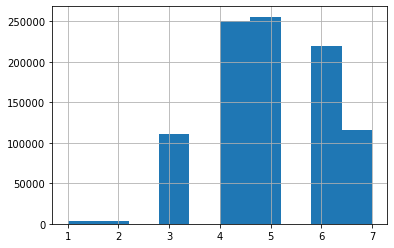

In [29]:
#age of responders
df['age'].hist();

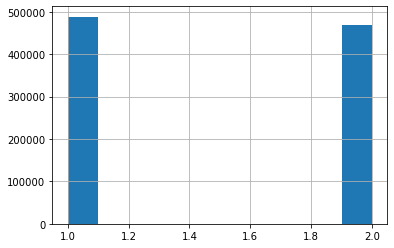

In [30]:
#gender of the responders
df['sex'].hist();

let's start with the grades column.

<b> Q89. </b> During the past 12 months, how would you describe your grades in school? <br>
A. Mostly A's <br>
B. Mostly B's <br>
C. Mostly C's <br>
D. Mostly D's <br>
E. Mostly F's <br>
F. None of these grades <br>
G. Not sure <br>

In [31]:
#counting the number of null values in 'q89' column
df['q89'].isnull().sum()

506337

In [32]:
#type of 'q89' column
df['q89'].dtype

dtype('float64')

We assume 'None of these grades' and 'Not sure' as null values. Since these too answers do no provide any information.

In [33]:
#convert the column to categorical variables
df['q89'].replace(1.0, 'Mostly A\'s', inplace = True)
df['q89'].replace(2.0, 'Mostly B\'s', inplace = True)
df['q89'].replace(3.0, 'Mostly C\'s', inplace = True)
df['q89'].replace(4.0, 'Mostly D\'s', inplace = True)
df['q89'].replace(5.0, 'Mostly F\'s', inplace = True)
df['q89'].replace(6.0, np.nan, inplace = True) #converting to null values
df['q89'].replace(7.0, np.nan, inplace = True) #converting to null values
df['q89'].unique()

array([nan, "Mostly A's", "Mostly D's", "Mostly B's", "Mostly F's",
       "Mostly C's"], dtype=object)

In [34]:
#finding the percentage of each grade
grades = df['q89'].value_counts(normalize=True)*100
grades

Mostly B's    38.571899
Mostly A's    35.235809
Mostly C's    20.013085
Mostly D's     4.445740
Mostly F's     1.733468
Name: q89, dtype: float64

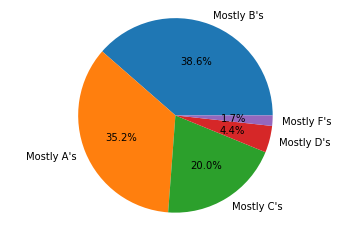

In [35]:
# pie plot of grades
labels = ["Mostly B's", "Mostly A's", "Mostly C's", "Mostly D's", "Mostly F's"]
fig1, ax1 = plt.subplots()
ax1.pie(grades, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The students categorized their grades into 5 different types of A's, B's, C's, D's, and F's.

Let's explore the rest of questions. 

<b> Q30 </b> . Have you ever tried cigarette smoking, even one or two puffs? <br>
A. Yes <br>
B. No <br>

In [36]:
df['q30'].unique()

array([ 1., nan,  2.])

In [37]:
#convert the column to categorical variables
df['q30'].replace(1.0, "Yes", inplace = True)
df['q30'].replace(2.0, "No", inplace = True)
df['q30'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [38]:
#grouping the values based on the grades
smoking = df.groupby('q89')['q30'].value_counts(normalize=True) * 100
smoking = smoking.to_frame()
smoking = smoking.rename(columns={'q30': 'column'}).reset_index()
smoking = smoking.rename(columns={'q30': 'Smoking',
                                    'q89':'Grades',
                                    'column': 'Percentage of People'})
smoking

,Grades,Smoking,Percentage of People
0,Mostly A's,No,72.193851
1,Mostly A's,Yes,27.806149
2,Mostly B's,No,56.412237
3,Mostly B's,Yes,43.587763
4,Mostly C's,Yes,58.253820
5,Mostly C's,No,41.746180
6,Mostly D's,Yes,68.340064
7,Mostly D's,No,31.659936
8,Mostly F's,Yes,75.079217
9,Mostly F's,No,24.920783


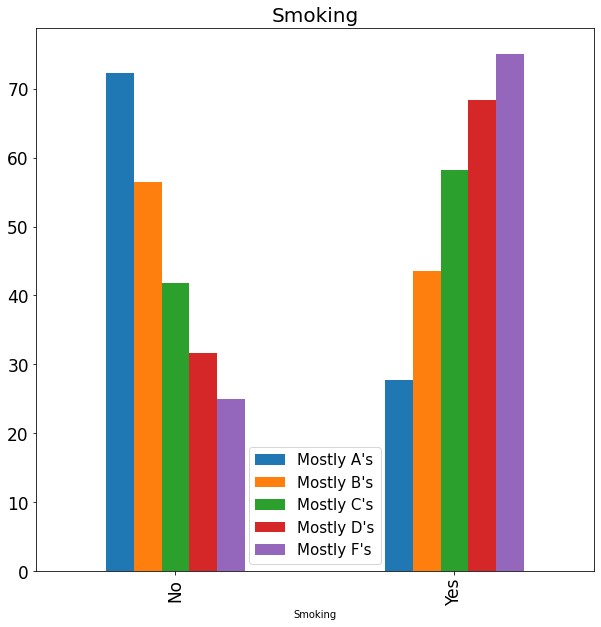

In [39]:
#Visulizing the results
smoking.pivot("Smoking", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Smoking', fontsize = 20);

As we can see the porportion of F students you answered yes is much higher than A students and vice versa.

<b> Q19 </b>. Have you ever been physically forced to have sexual intercourse when you did not want to? <br>
A. Yes <br>
B. No <br>

In [40]:
df['q19'].unique()

array([ 2.,  1., nan])

In [41]:
#convert the column to categorical variables
df['q19'].replace(1.0, "Yes", inplace = True)
df['q19'].replace(2.0, "No", inplace = True)
df['q19'].unique()

array(['No', 'Yes', nan], dtype=object)

In [42]:
#grouping the values based on the grades
Forced_sexual_intercourse = df.groupby('q89')['q19'].value_counts(normalize=True) * 100
Forced_sexual_intercourse = Forced_sexual_intercourse.to_frame()
Forced_sexual_intercourse = Forced_sexual_intercourse.rename(columns={'q19': 'column'}).reset_index()
Forced_sexual_intercourse = Forced_sexual_intercourse.rename(columns={'q19': 'Forced_sexual_intercourse',
                                                                      'q89':'Grades',
                                                                      'column': 'Percentage of People'})
Forced_sexual_intercourse

,Grades,Forced_sexual_intercourse,Percentage of People
0,Mostly A's,No,93.560925
1,Mostly A's,Yes,6.439075
2,Mostly B's,No,91.945643
3,Mostly B's,Yes,8.054357
4,Mostly C's,No,89.854685
5,Mostly C's,Yes,10.145315
6,Mostly D's,No,86.752039
7,Mostly D's,Yes,13.247961
8,Mostly F's,No,76.443657
9,Mostly F's,Yes,23.556343


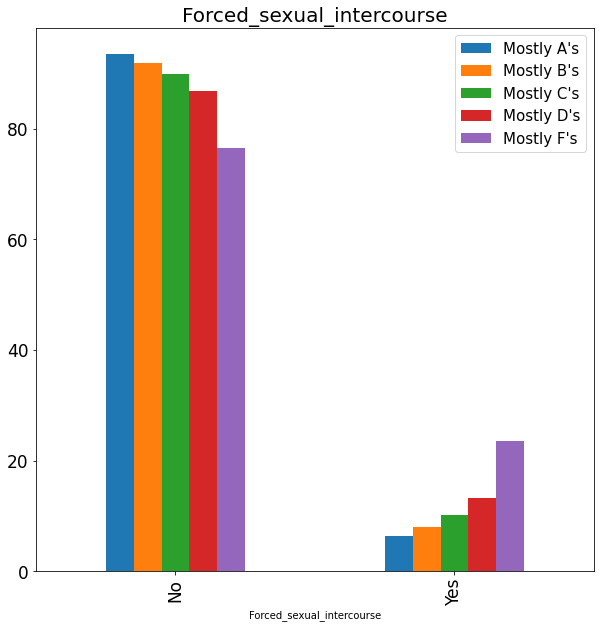

In [43]:
#Visulizing the results
Forced_sexual_intercourse.pivot("Forced_sexual_intercourse", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Forced_sexual_intercourse', fontsize = 20);

And the same trend is visible here as well. (such as previous one in smoking)

<b> Q23. </b> During the past 12 months, have you ever been bullied on school property?<br>
A. Yes <br>
B. No <br>

In [44]:
df['q23'].unique()

array([nan,  1.,  2.])

In [45]:
#convert the column to categorical variables
df['q23'].replace(1.0, "Yes", inplace = True)
df['q23'].replace(2.0, "No", inplace = True)
df['q23'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [46]:
#grouping the values based on the grades
Bullying_at_school = df.groupby('q89')['q23'].value_counts(normalize=True) * 100
Bullying_at_school = Bullying_at_school.to_frame()
Bullying_at_school = Bullying_at_school.rename(columns={'q23': 'column'}).reset_index()
Bullying_at_school = Bullying_at_school.rename(columns={'q23': 'Bullying_at_school',
                                                                      'q89':'Grades',
                                                                      'column': 'Percentage of People'})
Bullying_at_school

,Grades,Bullying_at_school,Percentage of People
0,Mostly A's,No,81.577679
1,Mostly A's,Yes,18.422321
2,Mostly B's,No,79.697626
3,Mostly B's,Yes,20.302374
4,Mostly C's,No,77.220108
5,Mostly C's,Yes,22.779892
6,Mostly D's,No,73.343220
7,Mostly D's,Yes,26.656780
8,Mostly F's,No,64.963844
9,Mostly F's,Yes,35.036156


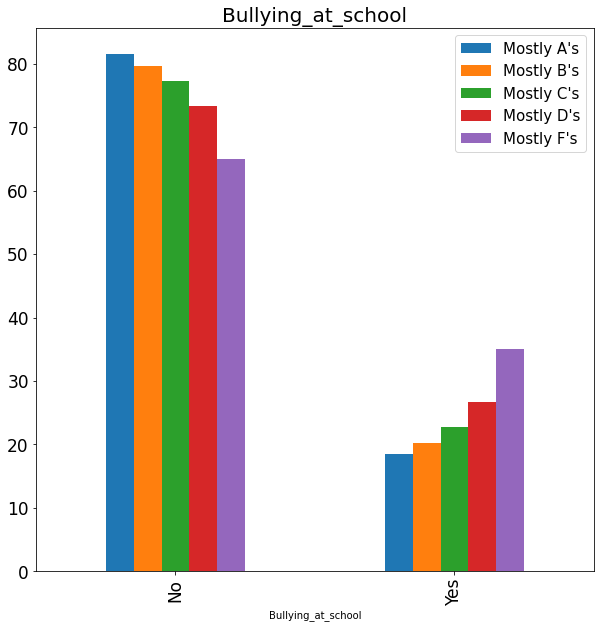

In [47]:
#Visulizing the results
Bullying_at_school.pivot("Bullying_at_school", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Bullying_at_school', fontsize = 20);

And the same trend is visible here as well. (such as previous one in smoking)

<b> Q24. </b> During the past 12 months, have you ever been electronically bullied? <br>
(Count being bullied through texting, Instagram, Facebook, or other social media.) <br>
A. Yes <br>
B. No <br>

In [48]:
df['q24'].unique()

array([nan,  1.,  2.])

In [49]:
#convert the column to categorical variables
df['q24'].replace(1.0, "Yes", inplace = True)
df['q24'].replace(2.0, "No", inplace = True)
df['q24'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [50]:
#grouping the values based on the grades
Electronic_bullying = df.groupby('q89')['q24'].value_counts(normalize=True) * 100
Electronic_bullying = Electronic_bullying.to_frame()
Electronic_bullying = Electronic_bullying.rename(columns={'q24': 'column'}).reset_index()
Electronic_bullying = Electronic_bullying.rename(columns={'q24': 'Electronic_bullying',
                                                                      'q89':'Grades',
                                                                      'column': 'Percentage of People'})
Electronic_bullying

,Grades,Electronic_bullying,Percentage of People
0,Mostly A's,No,85.881393
1,Mostly A's,Yes,14.118607
2,Mostly B's,No,83.667493
3,Mostly B's,Yes,16.332507
4,Mostly C's,No,81.757095
5,Mostly C's,Yes,18.242905
6,Mostly D's,No,77.829025
7,Mostly D's,Yes,22.170975
8,Mostly F's,No,69.660787
9,Mostly F's,Yes,30.339213


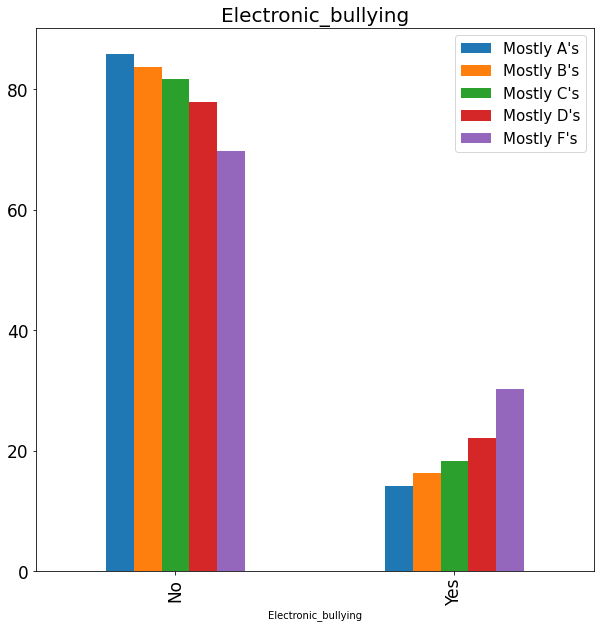

In [51]:
#Visulizing the results
Electronic_bullying.pivot("Electronic_bullying", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Electronic_bullying', fontsize = 20);

And the same trend is visible here as well. (such as previous one in smoking)

<b> Q25. </b> During the past 12 months, did you ever feel so sad or hopeless almost every day for two weeks or more in a row that you stopped doing some usual activities? <br>
A. Yes <br>
B. No <br>

In [52]:
df['q25'].unique()

array([ 1.,  2., nan])

In [53]:
#convert the column to categorical variables
df['q25'].replace(1.0, "Yes", inplace = True)
df['q25'].replace(2.0, "No", inplace = True)
df['q25'].unique()

array(['Yes', 'No', nan], dtype=object)

In [54]:
#grouping the values based on the grades
hopeless = df.groupby('q89')['q25'].value_counts(normalize=True) * 100
hopeless = hopeless.to_frame()
hopeless = hopeless.rename(columns={'q25': 'column'}).reset_index()
hopeless = hopeless.rename(columns={'q25': 'hopeless',
                                    'q89':'Grades',
                                    'column': 'Percentage of People'})
hopeless

,Grades,hopeless,Percentage of People
0,Mostly A's,No,77.765532
1,Mostly A's,Yes,22.234468
2,Mostly B's,No,71.729688
3,Mostly B's,Yes,28.270312
4,Mostly C's,No,65.726110
5,Mostly C's,Yes,34.273890
6,Mostly D's,No,57.585748
7,Mostly D's,Yes,42.414252
8,Mostly F's,Yes,51.826830
9,Mostly F's,No,48.173170


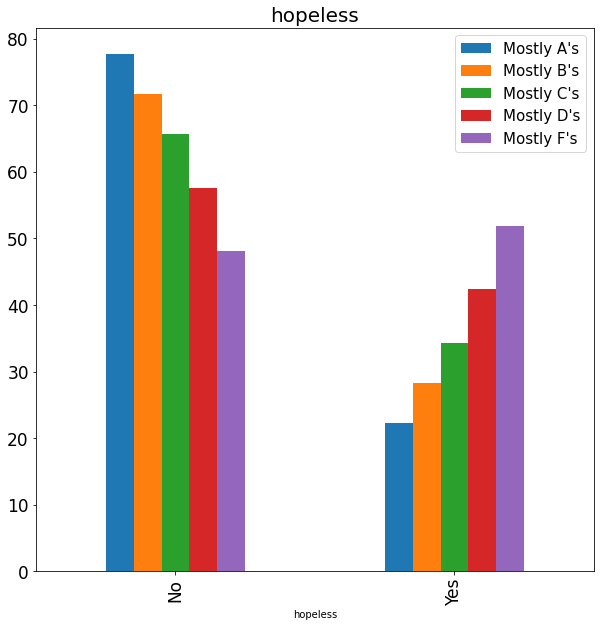

In [55]:
#Visulizing the results
hopeless.pivot("hopeless", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('hopeless', fontsize = 20);

Same!

<b> Q26. </b> During the past 12 months, did you ever seriously consider attempting suicide? <br>
A. Yes <br>
B. No <br>

In [56]:
df['q26'].unique()

array([ 2.,  1., nan])

In [57]:
#convert the column to categorical variables
df['q26'].replace(1.0, "Yes", inplace = True)
df['q26'].replace(2.0, "No", inplace = True)
df['q26'].unique()

array(['No', 'Yes', nan], dtype=object)

In [58]:
#grouping the values based on the grades
Considered_suicide = df.groupby('q89')['q26'].value_counts(normalize=True) * 100
Considered_suicide = Considered_suicide.to_frame()
Considered_suicide = Considered_suicide.rename(columns={'q26': 'column'}).reset_index()
Considered_suicide = Considered_suicide.rename(columns={'q26': 'Considered_suicide',
                                                        'q89':'Grades',
                                                        'column': 'Percentage of People'})
Considered_suicide

,Grades,Considered_suicide,Percentage of People
0,Mostly A's,No,87.402473
1,Mostly A's,Yes,12.597527
2,Mostly B's,No,84.476020
3,Mostly B's,Yes,15.523980
4,Mostly C's,No,80.214167
5,Mostly C's,Yes,19.785833
6,Mostly D's,No,72.900074
7,Mostly D's,Yes,27.099926
8,Mostly F's,No,62.765811
9,Mostly F's,Yes,37.234189


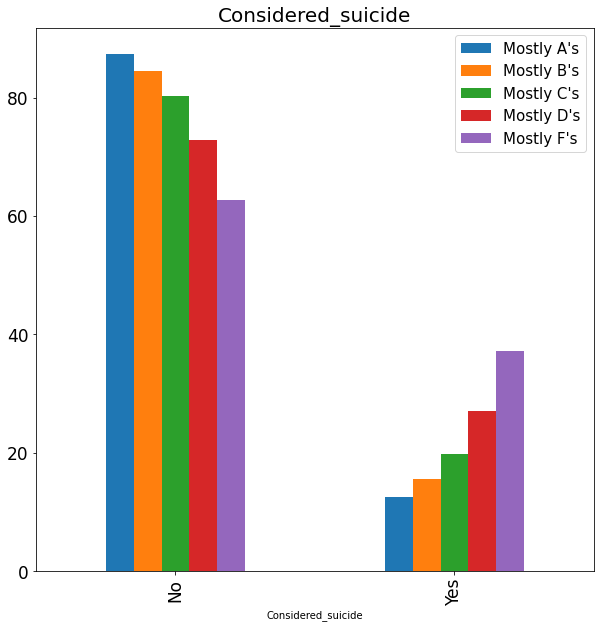

In [59]:
#Visulizing the results
Considered_suicide.pivot("Considered_suicide", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Considered_suicide', fontsize = 20);

And the same trend is visible here as well. (such as previous one in smoking)

<b> Q27. </b> During the past 12 months, did you make a plan about how you would attempt suicide? <br>
A. Yes <br>
B. No <br>

In [60]:
df['q27'].unique()

array([ 2.,  1., nan])

In [61]:
#convert the column to categorical variables
df['q27'].replace(1.0, "Yes", inplace = True)
df['q27'].replace(2.0, "No", inplace = True)
df['q27'].unique()

array(['No', 'Yes', nan], dtype=object)

In [62]:
#grouping the values based on the grades
suicide_plan = df.groupby('q89')['q27'].value_counts(normalize=True) * 100
suicide_plan = suicide_plan.to_frame()
suicide_plan = suicide_plan.rename(columns={'q27': 'column'}).reset_index()
suicide_plan = suicide_plan.rename(columns={'q27': 'suicide_plan',
                                            'q89':'Grades',
                                            'column': 'Percentage of People'})
suicide_plan

,Grades,suicide_plan,Percentage of People
0,Mostly A's,No,89.276558
1,Mostly A's,Yes,10.723442
2,Mostly B's,No,87.396265
3,Mostly B's,Yes,12.603735
4,Mostly C's,No,83.995176
5,Mostly C's,Yes,16.004824
6,Mostly D's,No,77.348821
7,Mostly D's,Yes,22.651179
8,Mostly F's,No,67.101170
9,Mostly F's,Yes,32.898830


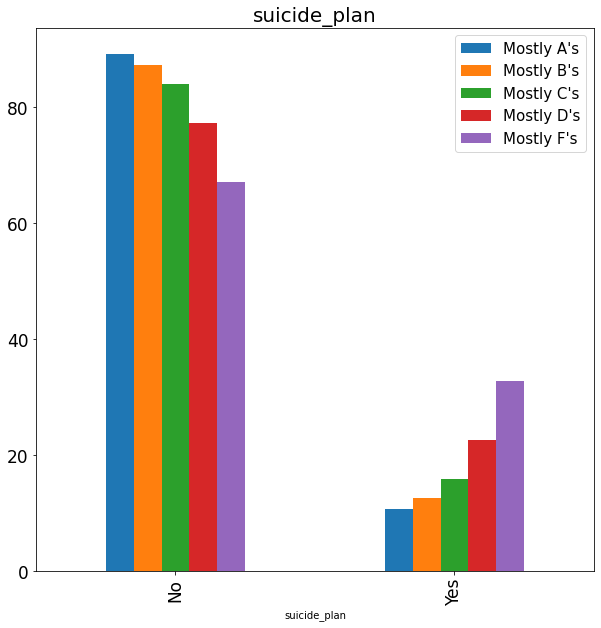

In [63]:
#Visulizing the results
suicide_plan.pivot("suicide_plan", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('suicide_plan', fontsize = 20);

And the same trend is visible here as well. (such as previous one in smoking)

<b> Q29.</b> If you attempted suicide during the past 12 months, did any attempt result in an injury, poisoning, or overdose that had to be treated by a doctor or nurse?
A. I did not attempt suicide during the past 12 months <br>
B. Yes <br>
C. No <br>

In [64]:
df['q29'].unique()

array([ 1., nan,  2.,  3.])

In [65]:
#convert the column to categorical variables
df['q29'].replace(1.0, "I did not attempt suicide", inplace = True)
df['q29'].replace(2.0, "Yes", inplace = True)
df['q29'].replace(3.0, "No", inplace = True)
df['q29'].unique()

array(['I did not attempt suicide', nan, 'Yes', 'No'], dtype=object)

In [66]:
#grouping the values based on the grades
Injurious_suicide_attempt = df.groupby('q89')['q29'].value_counts(normalize=True) * 100
Injurious_suicide_attempt = Injurious_suicide_attempt.to_frame()
Injurious_suicide_attempt = Injurious_suicide_attempt.rename(columns={'q29': 'column'}).reset_index()
Injurious_suicide_attempt = Injurious_suicide_attempt.rename(columns={'q29': 'Injurious_suicide_attempt',
                                                                      'q89':'Grades',
                                                                      'column': 'Percentage of People'})
Injurious_suicide_attempt

,Grades,Injurious_suicide_attempt,Percentage of People
0,Mostly A's,I did not attempt suicide,94.510314
1,Mostly A's,No,3.602195
2,Mostly A's,Yes,1.887491
3,Mostly B's,I did not attempt suicide,91.783179
4,Mostly B's,No,5.603516
5,Mostly B's,Yes,2.613306
6,Mostly C's,I did not attempt suicide,87.817511
7,Mostly C's,No,8.012592
8,Mostly C's,Yes,4.169897
9,Mostly D's,I did not attempt suicide,82.110837


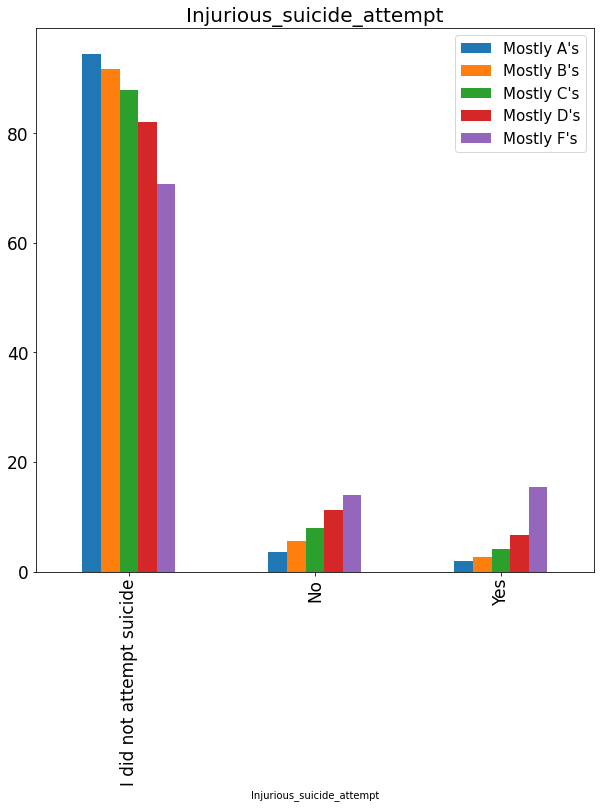

In [67]:
#Visulizing the results
Injurious_suicide_attempt.pivot("Injurious_suicide_attempt", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Injurious_suicide_attempt', fontsize = 20);

Here, A students have the highest porportion of not attempting the suicide and F students has the highest porportion in being both inured and not injured.

<b> Q34. </b> Have you ever used an electronic vapor product? <br>
A. Yes <br>
B. No <br>

In [68]:
df['q34'].unique()

array([nan,  1.,  2.])

In [69]:
#convert the column to categorical variables
df['q34'].replace(1.0, "Yes", inplace = True)
df['q34'].replace(2.0, "No", inplace = True)
df['q34'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [70]:
#grouping the values based on the grades
Electronic_vapor_product_use = df.groupby('q89')['q34'].value_counts(normalize=True) * 100
Electronic_vapor_product_use = Electronic_vapor_product_use.to_frame()
Electronic_vapor_product_use = Electronic_vapor_product_use.rename(columns={'q34': 'column'}).reset_index()
Electronic_vapor_product_use = Electronic_vapor_product_use.rename(columns={'q34': 'Electronic_vapor_product_use',
                                                                             'q89':'Grades',
                                                                             'column': 'Percentage of People'})
Electronic_vapor_product_use 

,Grades,Electronic_vapor_product_use,Percentage of People
0,Mostly A's,No,69.009137
1,Mostly A's,Yes,30.990863
2,Mostly B's,No,56.709913
3,Mostly B's,Yes,43.290087
4,Mostly C's,Yes,54.084288
5,Mostly C's,No,45.915712
6,Mostly D's,Yes,61.654915
7,Mostly D's,No,38.345085
8,Mostly F's,Yes,66.290323
9,Mostly F's,No,33.709677


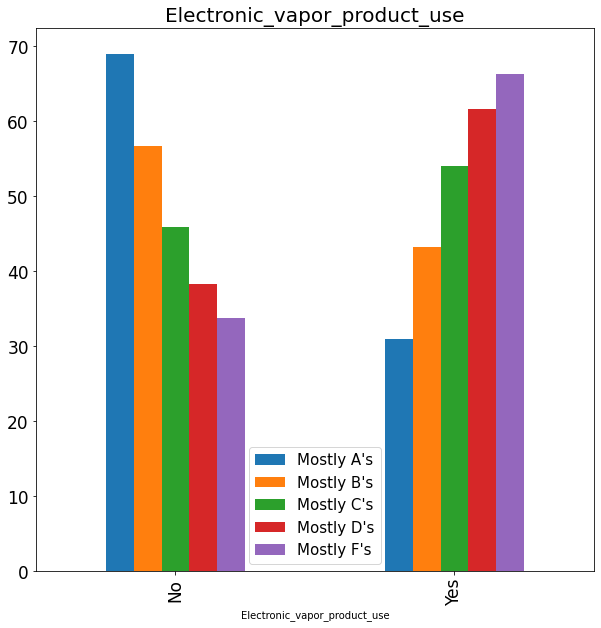

In [71]:
#Visulizing the results
Electronic_vapor_product_use.pivot("Electronic_vapor_product_use", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Electronic_vapor_product_use', fontsize = 20);

Same trend as smoking and previouds ones.

<b> Q39. </b> During the past 12 months, did you ever try to quit using all tobacco products, including cigarettes, cigars, smokeless tobacco, shisha or hookah tobacco, and electronic vapor products? <br>
A. I did not use any tobacco products during the past 12 months <br>
B. Yes <br>
C. No <br>

In [72]:
df['q39'].unique()

array([nan,  1.,  2.,  3.])

In [73]:
#convert the column to categorical variables
df['q39'].replace(1.0, "I did not use any tobacco products during the past 12 months", inplace = True)
df['q39'].replace(2.0, "Yes", inplace = True)
df['q39'].replace(3.0, "No", inplace = True)
df['q39'].unique()

array([nan,
       'I did not use any tobacco products during the past 12 months',
       'Yes', 'No'], dtype=object)

In [74]:
#grouping the values based on the grades
tobacco_product = df.groupby('q89')['q39'].value_counts(normalize=True) * 100
tobacco_product = tobacco_product.to_frame()
tobacco_product = tobacco_product.rename(columns={'q39': 'column'}).reset_index()
tobacco_product = tobacco_product.rename(columns={'q39': 'tobacco_product',
                                                  'q89':'Grades',
                                                  'column': 'Percentage of People'})
tobacco_product  

,Grades,tobacco_product,Percentage of People
0,Mostly A's,I did not use any tobacco products during the ...,85.195193
1,Mostly A's,No,8.426367
2,Mostly A's,Yes,6.378440
3,Mostly B's,I did not use any tobacco products during the ...,75.727792
4,Mostly B's,No,13.610409
5,Mostly B's,Yes,10.661799
6,Mostly C's,I did not use any tobacco products during the ...,65.022518
7,Mostly C's,No,19.515333
8,Mostly C's,Yes,15.462149
9,Mostly D's,I did not use any tobacco products during the ...,54.803922


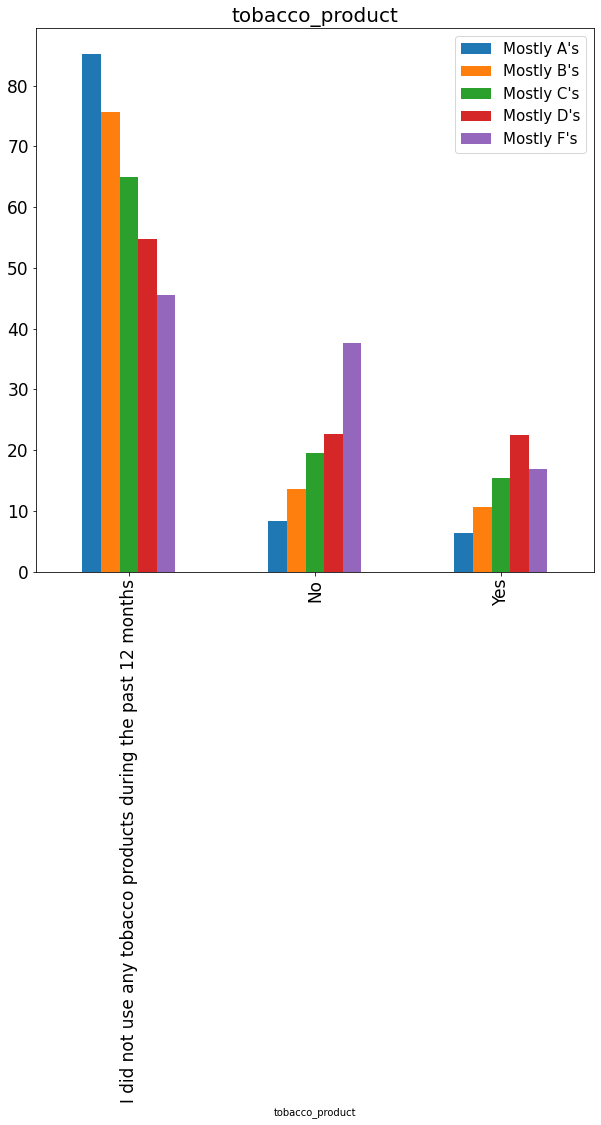

In [75]:
#Visulizing the results
tobacco_product.pivot("tobacco_product", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('tobacco_product', fontsize = 20);

Interesting, D students has the highest porportion of using tobacco.

<b> Q58. </b> During the past 12 months, has anyone offered, sold, or given you an illegal drug on school property? <br>
A. Yes <br>
B. No <br>

In [76]:
df['q58'].unique()

array([ 2.,  1., nan,  4.,  3.])

In [77]:
#convert the column to categorical variables
df['q58'].replace(1.0, "Yes", inplace = True)
df['q58'].replace(2.0, "No", inplace = True)
df['q58'].unique() 

array(['No', 'Yes', nan, 4.0, 3.0], dtype=object)

In [78]:
#grouping the values based on the grades
Illegal_drugs_at_school = df.groupby('q89')['q58'].value_counts(normalize=True) * 100
Illegal_drugs_at_school = Illegal_drugs_at_school.to_frame()
Illegal_drugs_at_school = Illegal_drugs_at_school.rename(columns={'q58': 'column'}).reset_index()
Illegal_drugs_at_school = Illegal_drugs_at_school.rename(columns={'q58': 'Illegal_drugs_at_school',
                                                                  'q89':'Grades',
                                                                  'column': 'Percentage of People'})
Illegal_drugs_at_school

,Grades,Illegal_drugs_at_school,Percentage of People
0,Mostly A's,No,81.253592
1,Mostly A's,Yes,18.746408
2,Mostly B's,No,76.726847
3,Mostly B's,Yes,23.273153
4,Mostly C's,No,71.173944
5,Mostly C's,Yes,28.826056
6,Mostly D's,No,63.559369
7,Mostly D's,Yes,36.440631
8,Mostly F's,No,52.896207
9,Mostly F's,Yes,47.103793


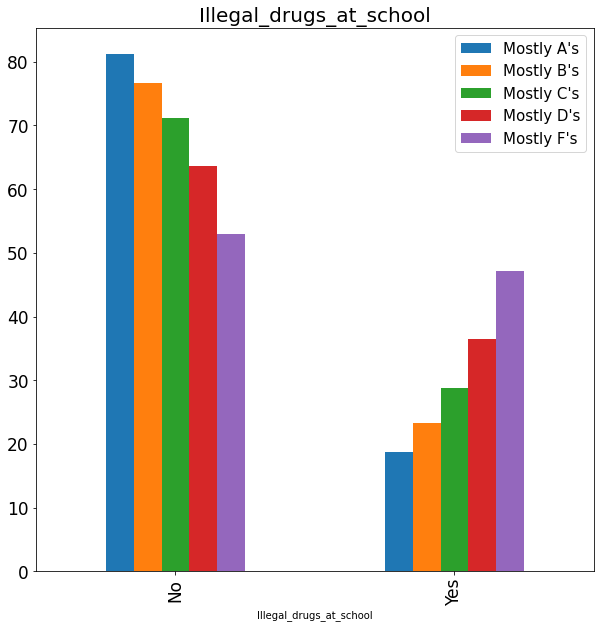

In [79]:
#Visulizing the results
Illegal_drugs_at_school.pivot("Illegal_drugs_at_school", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Illegal_drugs_at_school', fontsize = 20);

Same!

<b> Q59. </b> Have you ever had sexual intercourse? <br>
A. Yes <br>
B. No <br>

In [80]:
df['q59'].unique()

array([ 1., nan,  2.])

In [81]:
#convert the column to categorical variables
df['q59'].replace(1.0, "Yes", inplace = True)
df['q59'].replace(2.0, "No", inplace = True)
df['q59'].unique() 

array(['Yes', nan, 'No'], dtype=object)

In [82]:
#grouping the values based on the grades
sexual_intercourse = df.groupby('q89')['q59'].value_counts(normalize=True) * 100
sexual_intercourse = sexual_intercourse.to_frame()
sexual_intercourse = sexual_intercourse.rename(columns={'q59': 'column'}).reset_index()
sexual_intercourse = sexual_intercourse.rename(columns={'q59': 'sexual_intercourse',
                                                        'q89':'Grades',
                                                        'column': 'Percentage of People'})
sexual_intercourse

,Grades,sexual_intercourse,Percentage of People
0,Mostly A's,No,70.125562
1,Mostly A's,Yes,29.874438
2,Mostly B's,No,56.129897
3,Mostly B's,Yes,43.870103
4,Mostly C's,Yes,56.139060
5,Mostly C's,No,43.860940
6,Mostly D's,Yes,62.668039
7,Mostly D's,No,37.331961
8,Mostly F's,Yes,69.713887
9,Mostly F's,No,30.286113


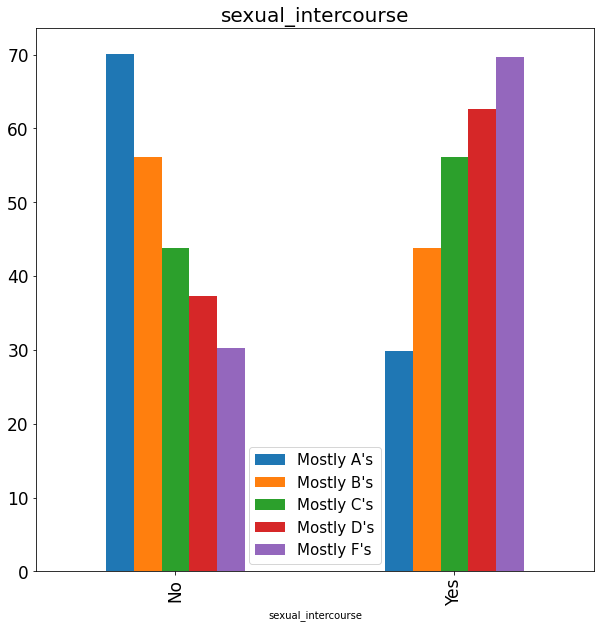

In [83]:
#Visulizing the results
sexual_intercourse.pivot("sexual_intercourse", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('sexual_intercourse', fontsize = 20);

Same!

<b> Q63. </b> Did you drink alcohol or use drugs before you had sexual intercourse the last time? <br>
A. I have never had sexual intercourse <br>
B. Yes <br>
C. No <br>

In [84]:
df['q63'].unique()

array([ 3.,  2., nan,  1.])

In [85]:
#convert the column to categorical variables
df['q63'].replace(1.0, "I have never had sexual intercourse", inplace = True)
df['q63'].replace(2.0, "Yes", inplace = True)
df['q63'].replace(3.0, "No", inplace = True)
df['q63'].unique() 

array(['No', 'Yes', nan, 'I have never had sexual intercourse'],
      dtype=object)

In [86]:
#grouping the values based on the grades
Alcohol_drugs_and_sex = df.groupby('q89')['q63'].value_counts(normalize=True) * 100
Alcohol_drugs_and_sex = Alcohol_drugs_and_sex.to_frame()
Alcohol_drugs_and_sex = Alcohol_drugs_and_sex.rename(columns={'q63': 'column'}).reset_index()
Alcohol_drugs_and_sex = Alcohol_drugs_and_sex.rename(columns={'q63': 'Alcohol_drugs_and_sex',
                                                        'q89':'Grades',
                                                        'column': 'Percentage of People'})
Alcohol_drugs_and_sex

,Grades,Alcohol_drugs_and_sex,Percentage of People
0,Mostly A's,I have never had sexual intercourse,70.195690
1,Mostly A's,No,25.001353
2,Mostly A's,Yes,4.802957
3,Mostly B's,I have never had sexual intercourse,56.106385
4,Mostly B's,No,35.719737
5,Mostly B's,Yes,8.173879
6,Mostly C's,I have never had sexual intercourse,44.006823
7,Mostly C's,No,42.861303
8,Mostly C's,Yes,13.131873
9,Mostly D's,No,43.959990


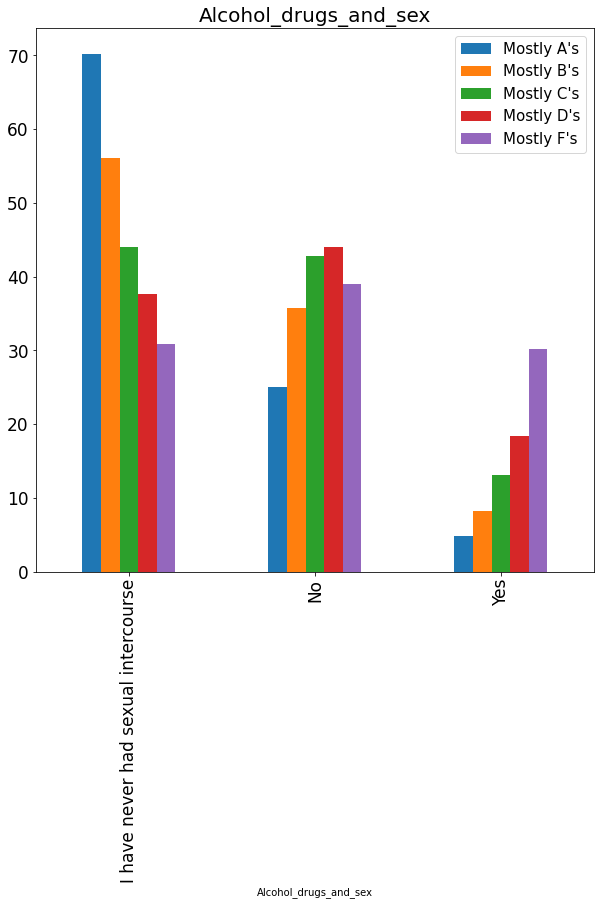

In [87]:
#Visulizing the results
Alcohol_drugs_and_sex.pivot("Alcohol_drugs_and_sex", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Alcohol_drugs_and_sex', fontsize = 20);

It is interesting to see F students has the lower porportion they have been asked about the alcohol consuption before sex.

<b> Q64. </b> The last time you had sexual intercourse, did you or your partner use a condom? <br>
A. I have never had sexual intercourse <br>
B. Yes <br>
C. No <br>

In [88]:
df['q64'].unique()

array([ 2., nan,  3.,  1.])

In [89]:
#convert the column to categorical variables
df['q64'].replace(1.0, "I have never had sexual intercourse", inplace = True)
df['q64'].replace(2.0, "Yes", inplace = True)
df['q64'].replace(3.0, "No", inplace = True)
df['q64'].unique()

array(['Yes', nan, 'No', 'I have never had sexual intercourse'],
      dtype=object)

In [90]:
#grouping the values based on the grades
Condom_use = df.groupby('q89')['q64'].value_counts(normalize=True) * 100
Condom_use = Condom_use.to_frame()
Condom_use = Condom_use.rename(columns={'q64': 'column'}).reset_index()
Condom_use = Condom_use.rename(columns={'q64': 'Condom_use',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
Condom_use

,Grades,Condom_use,Percentage of People
0,Mostly A's,I have never had sexual intercourse,70.460291
1,Mostly A's,Yes,18.762332
2,Mostly A's,No,10.777377
3,Mostly B's,I have never had sexual intercourse,56.663454
4,Mostly B's,Yes,27.856143
5,Mostly B's,No,15.480403
6,Mostly C's,I have never had sexual intercourse,44.655846
7,Mostly C's,Yes,34.895203
8,Mostly C's,No,20.448951
9,Mostly D's,I have never had sexual intercourse,38.297050


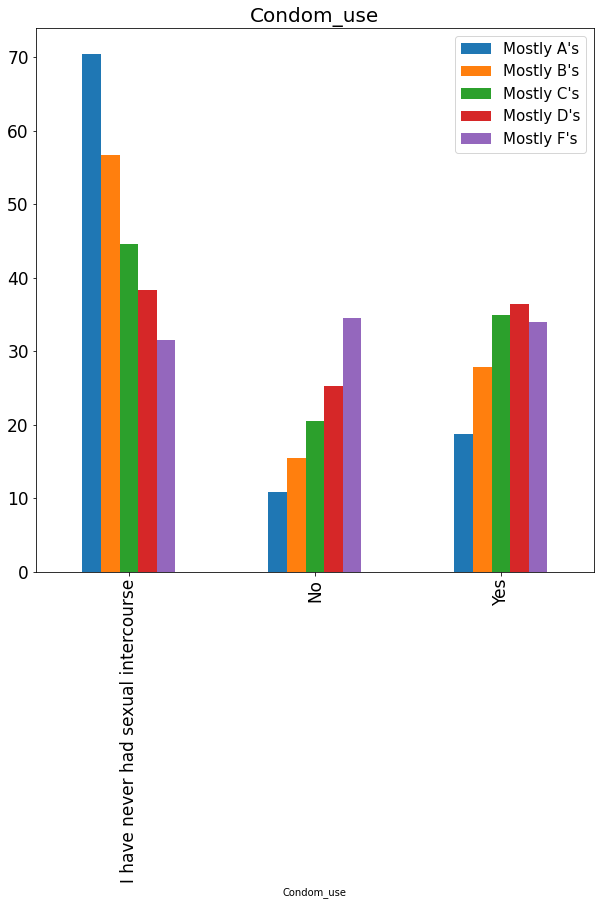

In [91]:
#Visulizing the results
Condom_use.pivot("Condom_use", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Condom_use', fontsize = 20);

This trend is also interesting but we need to note that the previous trend is still there. A students said they never had sexual intervourse.

<b> Q85.</b> Have you ever been tested for HIV, the virus that causes AIDS? (Do not count tests done if you donated blood.) <br>
A. Yes <br>
B. No <br>
C. Not sure <br>

In [92]:
df['q85'].unique()

array([nan,  3.,  2.,  1.])

In [93]:
#convert the column to categorical variables
df['q85'].replace(1.0, "Yes", inplace = True)
df['q85'].replace(2.0, "No", inplace = True)
df['q85'].replace(3.0, "Not Sure", inplace = True)
df['q85'].unique()

array([nan, 'Not Sure', 'No', 'Yes'], dtype=object)

In [94]:
#grouping the values based on the grades
HIV_testing = df.groupby('q89')['q85'].value_counts(normalize=True) * 100
HIV_testing = HIV_testing.to_frame()
HIV_testing = HIV_testing.rename(columns={'q85': 'column'}).reset_index()
HIV_testing = HIV_testing.rename(columns={'q85': 'HIV_testing',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
HIV_testing

,Grades,HIV_testing,Percentage of People
0,Mostly A's,No,78.330983
1,Mostly A's,Not Sure,11.456580
2,Mostly A's,Yes,10.212437
3,Mostly B's,No,77.258714
4,Mostly B's,Yes,11.906051
5,Mostly B's,Not Sure,10.835236
6,Mostly C's,No,73.133652
7,Mostly C's,Yes,15.741253
8,Mostly C's,Not Sure,11.125094
9,Mostly D's,No,70.458891


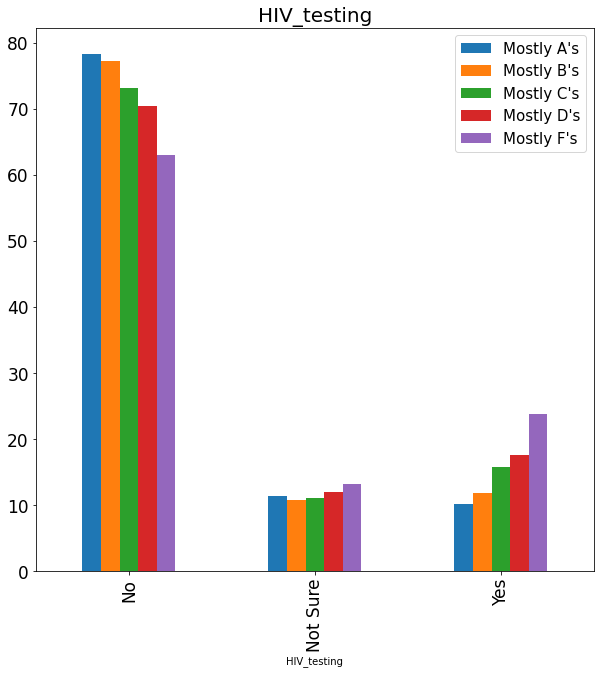

In [95]:
#Visulizing the results
HIV_testing.pivot("HIV_testing", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('HIV_testing', fontsize = 20);

This the same trend as well. 

<b> Q87. </b> Has a doctor or nurse ever told you that you have asthma? <br>
A. Yes <br>
B. No <br>
C. Not sure <br>

In [96]:
df['q87'].unique()

array([ 2., nan,  1.,  3.])

In [97]:
#convert the column to categorical variables
df['q87'].replace(1.0, "Yes", inplace = True)
df['q87'].replace(2.0, "No", inplace = True)
df['q87'].replace(3.0, "Not Sure", inplace = True)
df['q87'].unique()

array(['No', nan, 'Yes', 'Not Sure'], dtype=object)

In [98]:
#grouping the values based on the grades
Asthma = df.groupby('q89')['q87'].value_counts(normalize=True) * 100
Asthma = Asthma.to_frame()
Asthma = Asthma.rename(columns={'q87': 'column'}).reset_index()
Asthma = Asthma.rename(columns={'q87': 'Asthma',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
Asthma

,Grades,Asthma,Percentage of People
0,Mostly A's,No,73.612343
1,Mostly A's,Yes,22.816477
2,Mostly A's,Not Sure,3.571179
3,Mostly B's,No,72.870922
4,Mostly B's,Yes,22.872356
5,Mostly B's,Not Sure,4.256723
6,Mostly C's,No,70.124350
7,Mostly C's,Yes,24.391594
8,Mostly C's,Not Sure,5.484056
9,Mostly D's,No,66.700405


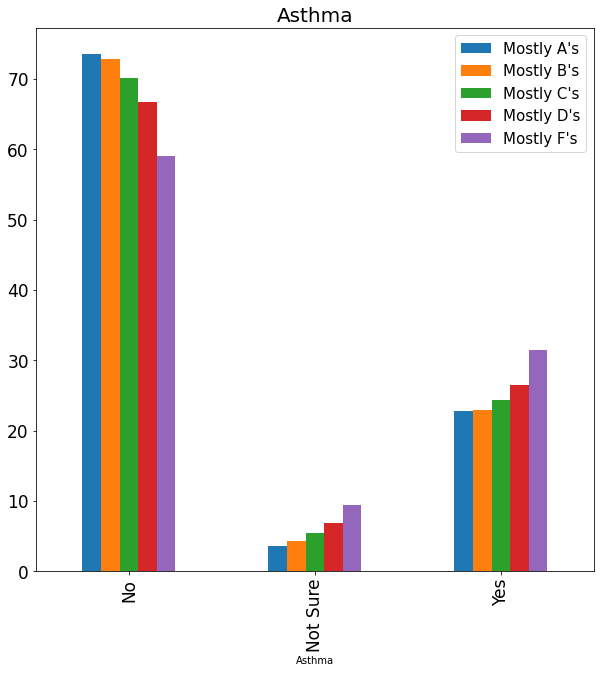

In [99]:
#Visulizing the results
Asthma.pivot("Asthma", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('Asthma', fontsize = 20);

For asthma, also the same trend is visible.

<b> qconcentrating: </b> <br>
Because of a physical, mental, or emotional problem, do you have serious difficulty concentrating, remembering, or making decisions? <br>
A. Yes <br>
B. No <br>

In [100]:
df['qconcentrating'].unique()

array([nan,  1.,  2.])

In [101]:
#convert the column to categorical variables
df['qconcentrating'].replace(1.0, "Yes", inplace = True)
df['qconcentrating'].replace(2.0, "No", inplace = True)
df['qconcentrating'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [102]:
#grouping the values based on the grades
concentrating = df.groupby('q89')['qconcentrating'].value_counts(normalize=True) * 100
concentrating = concentrating.to_frame()
concentrating = concentrating.rename(columns={'qconcentrating': 'column'}).reset_index()
concentrating = concentrating.rename(columns={'qconcentrating': 'concentrating',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
concentrating

,Grades,concentrating,Percentage of People
0,Mostly A's,No,84.281843
1,Mostly A's,Yes,15.718157
2,Mostly B's,No,77.559840
3,Mostly B's,Yes,22.440160
4,Mostly C's,No,69.240122
5,Mostly C's,Yes,30.759878
6,Mostly D's,No,59.133127
7,Mostly D's,Yes,40.866873
8,Mostly F's,No,53.174603
9,Mostly F's,Yes,46.825397


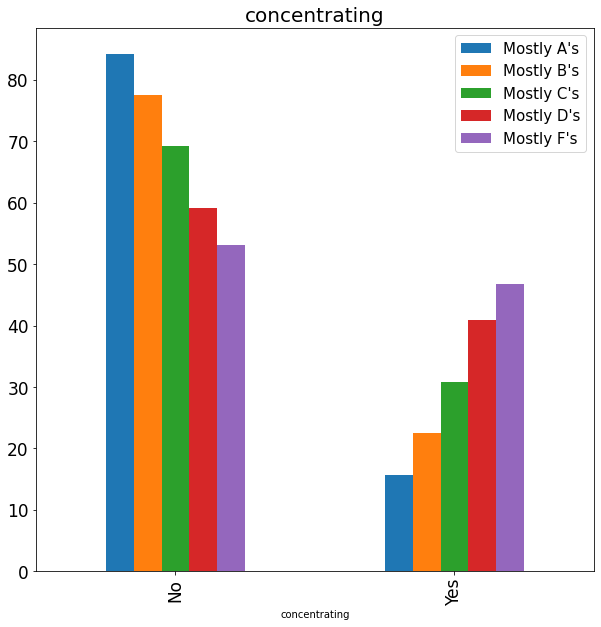

In [103]:
#Visulizing the results
concentrating.pivot("concentrating", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('concentrating', fontsize = 20);

poor grades might also be due to concentrating. 

<b> qfoodallergy:</b> <br>
Are there any foods that you have to avoid because eating the food could cause an allergic reaction, like skin rashes, swelling, itching, vomiting, coughing, or trouble breathing?<br>
A. Yes <br>
B. No <br>
C. Not sure <br>

In [104]:
df['qfoodallergy'].unique()

array([nan,  3.,  2.,  1.])

In [105]:
#convert the column to categorical variables
df['qfoodallergy'].replace(1.0, "Yes", inplace = True)
df['qfoodallergy'].replace(2.0, "No", inplace = True)
df['qfoodallergy'].replace(3.0, "Not Sure", inplace = True)
df['qfoodallergy'].unique()

array([nan, 'Not Sure', 'No', 'Yes'], dtype=object)

In [106]:
#grouping the values based on the grades
foodallergy = df.groupby('q89')['qfoodallergy'].value_counts(normalize=True) * 100
foodallergy = foodallergy.to_frame()
foodallergy = foodallergy.rename(columns={'qfoodallergy': 'column'}).reset_index()
foodallergy = foodallergy.rename(columns={'qfoodallergy': 'foodallergy',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
foodallergy

,Grades,foodallergy,Percentage of People
0,Mostly A's,No,74.591752
1,Mostly A's,Yes,14.918350
2,Mostly A's,Not Sure,10.489898
3,Mostly B's,No,73.617694
4,Mostly B's,Yes,14.218009
5,Mostly B's,Not Sure,12.164297
6,Mostly C's,No,67.144564
7,Mostly C's,Not Sure,16.786141
8,Mostly C's,Yes,16.069295
9,Mostly D's,No,63.684211


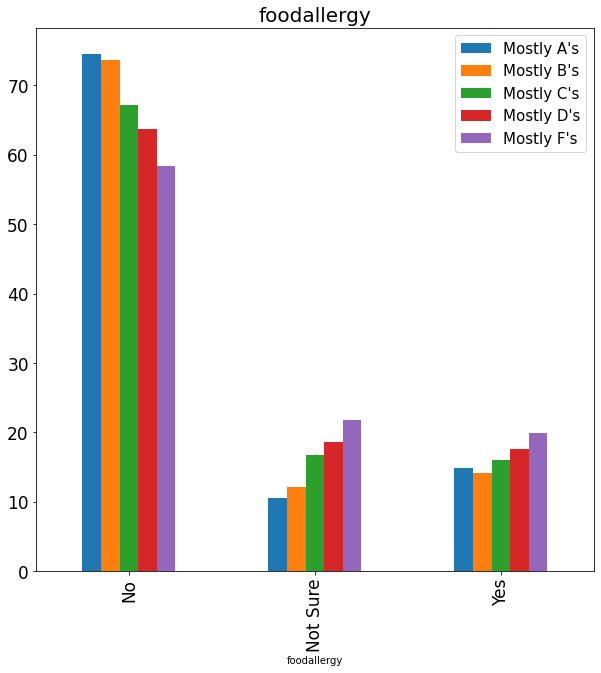

In [107]:
#Visulizing the results
foodallergy.pivot("foodallergy", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('foodallergy', fontsize = 20);

It is interesting that even food allergy is correlated with grades.

<b>qtaughtbc:</b> <br>
Have you ever been taught in school about birth control methods? <br>
A. Yes <br>
B. No <br>
C. Not sure <br>

In [108]:
df['qtaughtbc'].unique()

array([nan,  1.,  2.,  3.])

In [109]:
#convert the column to categorical variables
df['qtaughtbc'].replace(1.0, "Yes", inplace = True)
df['qtaughtbc'].replace(2.0, "No", inplace = True)
df['qtaughtbc'].replace(3.0, "Not Sure", inplace = True)
df['qtaughtbc'].unique()

array([nan, 'Yes', 'No', 'Not Sure'], dtype=object)

In [110]:
#grouping the values based on the grades
taught_bc = df.groupby('q89')['qtaughtbc'].value_counts(normalize=True) * 100
taught_bc = taught_bc.to_frame()
taught_bc = taught_bc.rename(columns={'qtaughtbc': 'column'}).reset_index()
taught_bc = taught_bc.rename(columns={'qtaughtbc': 'taught_bc',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
taught_bc

,Grades,taught_bc,Percentage of People
0,Mostly A's,Yes,68.703579
1,Mostly A's,No,24.577988
2,Mostly A's,Not Sure,6.718433
3,Mostly B's,Yes,66.379310
4,Mostly B's,No,26.810345
5,Mostly B's,Not Sure,6.810345
6,Mostly C's,Yes,66.049777
7,Mostly C's,No,24.696873
8,Mostly C's,Not Sure,9.253350
9,Mostly D's,Yes,63.239875


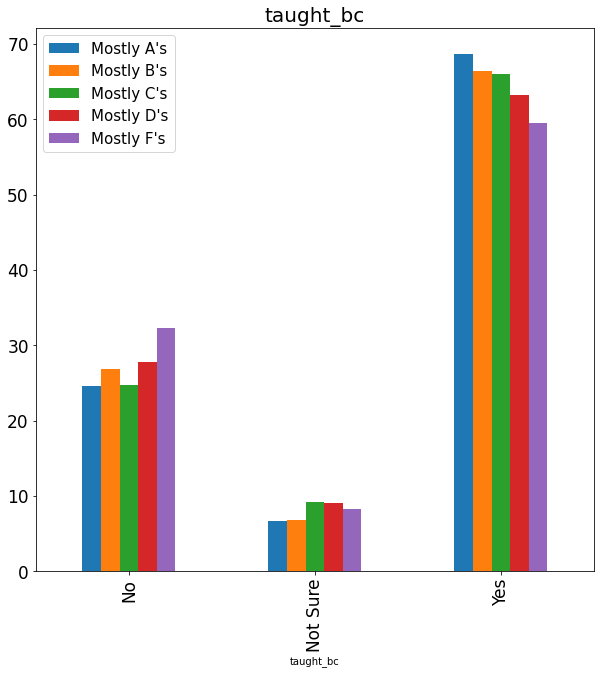

In [111]:
#Visulizing the results
taught_bc.pivot("taught_bc", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('taught_bc', fontsize = 20);

There are some exception when is comes to teachin birth control!

<b> qtaughtstd:</b> <br>
Have you ever been taught in school about sexually transmitted diseases (STDs)? <br>
A. Yes <br>
B. No <br>
C. Not sure <br>

In [112]:
df['qtaughtstd'].unique()

array([nan,  1.,  2.,  3.])

In [113]:
#convert the column to categorical variables
df['qtaughtstd'].replace(1.0, "Yes", inplace = True)
df['qtaughtstd'].replace(2.0, "No", inplace = True)
df['qtaughtstd'].replace(3.0, "Not Sure", inplace = True)
df['qtaughtstd'].unique()

array([nan, 'Yes', 'No', 'Not Sure'], dtype=object)

In [114]:
#grouping the values based on the grades
taught_std = df.groupby('q89')['qtaughtstd'].value_counts(normalize=True) * 100
taught_std = taught_std.to_frame()
taught_std = taught_std.rename(columns={'qtaughtstd': 'column'}).reset_index()
taught_std = taught_std.rename(columns={'qtaughtstd': 'taught_std',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
taught_std

,Grades,taught_std,Percentage of People
0,Mostly A's,Yes,82.248342
1,Mostly A's,No,13.562387
2,Mostly A's,Not Sure,4.189271
3,Mostly B's,Yes,78.592186
4,Mostly B's,No,16.822732
5,Mostly B's,Not Sure,4.585082
6,Mostly C's,Yes,75.347476
7,Mostly C's,No,18.873446
8,Mostly C's,Not Sure,5.779078
9,Mostly D's,Yes,70.250896


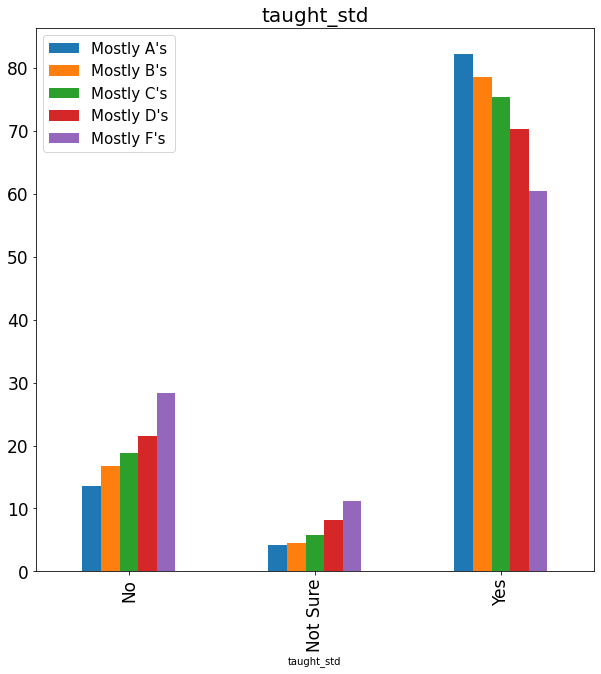

In [115]:
#Visulizing the results
taught_std.pivot("taught_std", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('taught_std', fontsize = 20);

Same trend is possible to see in here. 

<b> qtaughtsexed: </b> <br>
Have you ever had sex education in school? <br>
A. Yes <br>
B. No <br>
C. Not sure <br>

In [116]:
df['qtaughtsexed'].unique()

array([nan,  1.,  2.,  3.])

In [117]:
#convert the column to categorical variables
df['qtaughtsexed'].replace(1.0, "Yes", inplace = True)
df['qtaughtsexed'].replace(2.0, "No", inplace = True)
df['qtaughtsexed'].replace(3.0, "Not Sure", inplace = True)
df['qtaughtsexed'].unique()

array([nan, 'Yes', 'No', 'Not Sure'], dtype=object)

In [118]:
#grouping the values based on the grades
taught_sexed = df.groupby('q89')['qtaughtsexed'].value_counts(normalize=True) * 100
taught_sexed = taught_sexed.to_frame()
taught_sexed = taught_sexed.rename(columns={'qtaughtsexed': 'column'}).reset_index()
taught_sexed = taught_sexed.rename(columns={'qtaughtsexed': 'taught_sexed',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
taught_sexed

,Grades,taught_sexed,Percentage of People
0,Mostly A's,Yes,81.563736
1,Mostly A's,No,13.446912
2,Mostly A's,Not Sure,4.989352
3,Mostly B's,Yes,79.285949
4,Mostly B's,No,15.004936
5,Mostly B's,Not Sure,5.709115
6,Mostly C's,Yes,76.329510
7,Mostly C's,No,17.101147
8,Mostly C's,Not Sure,6.569343
9,Mostly D's,Yes,69.701493


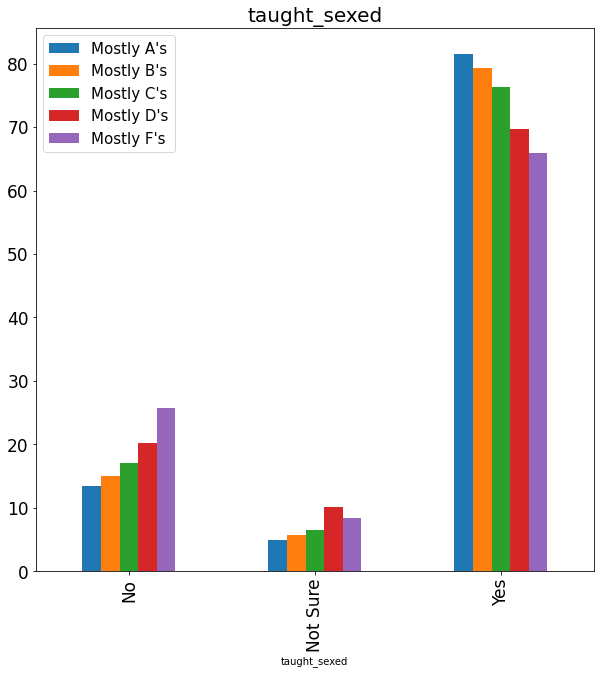

In [119]:
#Visulizing the results
taught_sexed.pivot("taught_sexed", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('taught_sexed', fontsize = 20);

we have one exception in 'not sure' answer

<b> qtaughtHIV: </b> <br>
Have you ever been taught about AIDS or HIV infection in school? <br>
A. Yes <br>
B. No <br>
C. Not sure <br>

In [120]:
df['qtaughtHIV'].unique()

array([ 1., nan,  2.,  3.])

In [121]:
#convert the column to categorical variables
df['qtaughtHIV'].replace(1.0, "Yes", inplace = True)
df['qtaughtHIV'].replace(2.0, "No", inplace = True)
df['qtaughtHIV'].replace(3.0, "Not Sure", inplace = True)
df['qtaughtHIV'].unique()

array(['Yes', nan, 'No', 'Not Sure'], dtype=object)

In [122]:
#grouping the values based on the grades
taught_HIV = df.groupby('q89')['qtaughtHIV'].value_counts(normalize=True) * 100
taught_HIV = taught_HIV.to_frame()
taught_HIV = taught_HIV.rename(columns={'qtaughtHIV': 'column'}).reset_index()
taught_HIV = taught_HIV.rename(columns={'qtaughtHIV': 'taught_HIV',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
taught_HIV

,Grades,taught_HIV,Percentage of People
0,Mostly A's,Yes,86.837196
1,Mostly A's,No,8.714116
2,Mostly A's,Not Sure,4.448688
3,Mostly B's,Yes,86.142268
4,Mostly B's,No,9.554213
5,Mostly B's,Not Sure,4.303518
6,Mostly C's,Yes,84.230154
7,Mostly C's,No,10.978205
8,Mostly C's,Not Sure,4.791641
9,Mostly D's,Yes,81.667191


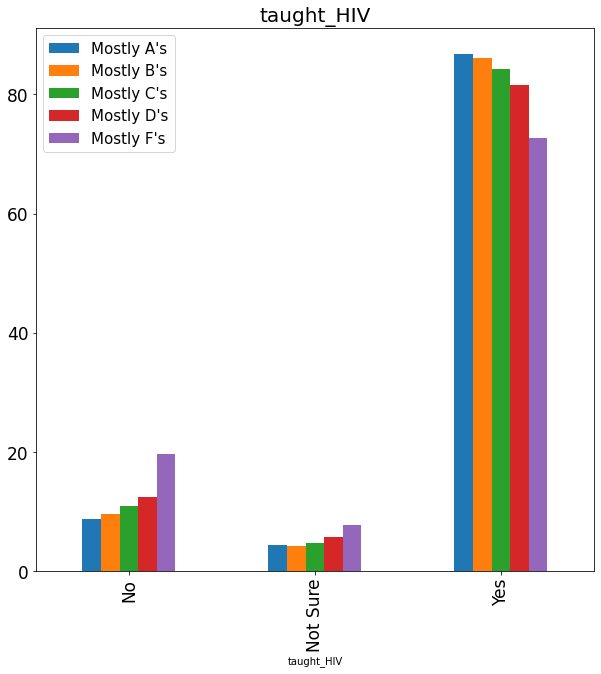

In [123]:
#Visulizing the results
taught_HIV.pivot("taught_HIV", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('taught_HIV', fontsize = 20);

same trend in here with no exception!

<b> qchokeself: </b> <br>
Have you ever been choked by someone or tried to choke yourself on purpose, such as with a belt, towel, or rope, for the feeling or experience it caused? (This is also called the Choking Game, Knock Out, Space Monkey, Flatlining, or the Fainting Game.) <br>
A. Yes <br>
B. No <br>

In [124]:
df['qchokeself'].unique()

array([nan,  2.,  1.])

In [125]:
#convert the column to categorical variables
df['qchokeself'].replace(1.0, "Yes", inplace = True)
df['qchokeself'].replace(2.0, "No", inplace = True)
df['qchokeself'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [126]:
#grouping the values based on the grades
self_chok = df.groupby('q89')['qchokeself'].value_counts(normalize=True) * 100
self_chok = self_chok.to_frame()
self_chok = self_chok.rename(columns={'qchokeself': 'column'}).reset_index()
self_chok = self_chok.rename(columns={'qchokeself': 'self_chok',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
self_chok

,Grades,self_chok,Percentage of People
0,Mostly A's,No,92.865576
1,Mostly A's,Yes,7.134424
2,Mostly B's,No,91.982153
3,Mostly B's,Yes,8.017847
4,Mostly C's,No,89.084181
5,Mostly C's,Yes,10.915819
6,Mostly D's,No,83.406114
7,Mostly D's,Yes,16.593886
8,Mostly F's,No,63.745020
9,Mostly F's,Yes,36.254980


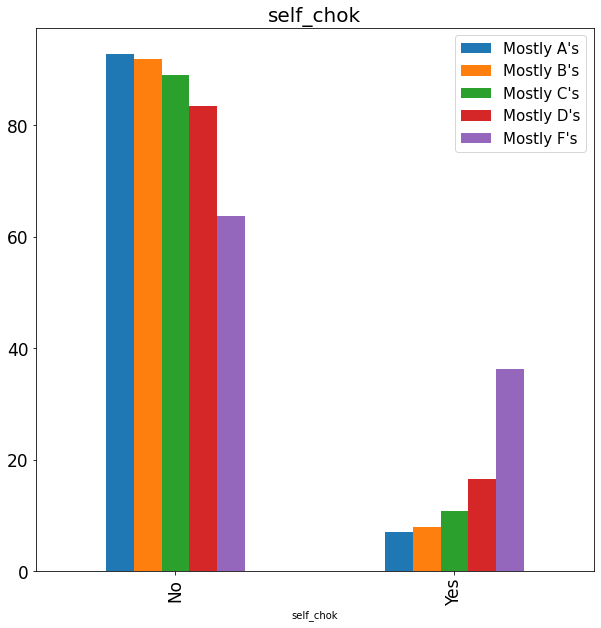

In [127]:
#Visulizing the results
self_chok.pivot("self_chok", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('self_chok', fontsize = 20);

Same trend in here as well. 

<b> qbullygay: </b> <br>
During the past 12 months, have you ever been the victim of teasing or name calling because someone thought you were gay, lesbian, or bisexual? <br>
A. Yes <br>
B. No <br>

In [128]:
df['qbullygay'].unique()

array([nan,  2.,  1.])

In [129]:
#convert the column to categorical variables
df['qbullygay'].replace(1.0, "Yes", inplace = True)
df['qbullygay'].replace(2.0, "No", inplace = True)
df['qbullygay'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [130]:
#grouping the values based on the grades
bully_gay = df.groupby('q89')['qbullygay'].value_counts(normalize=True) * 100
bully_gay = bully_gay.to_frame()
bully_gay = bully_gay.rename(columns={'qbullygay': 'column'}).reset_index()
bully_gay = bully_gay.rename(columns={'qbullygay': 'bully_gay',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
bully_gay

,Grades,bully_gay,Percentage of People
0,Mostly A's,No,90.664629
1,Mostly A's,Yes,9.335371
2,Mostly B's,No,89.728822
3,Mostly B's,Yes,10.271178
4,Mostly C's,No,87.661419
5,Mostly C's,Yes,12.338581
6,Mostly D's,No,81.912965
7,Mostly D's,Yes,18.087035
8,Mostly F's,No,72.747748
9,Mostly F's,Yes,27.252252


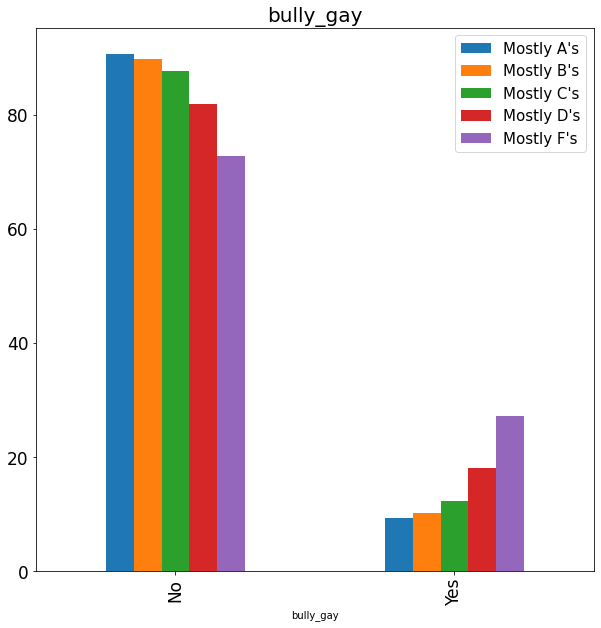

In [131]:
#Visulizing the results
bully_gay.pivot("bully_gay", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('bully_gay', fontsize = 20);

same trend!

<b> qbullygender: </b> <br>
During the past 12 months, have you ever been the victim of teasing or name calling because of your gender? <br>
A. Yes <br>
B. No <br>

In [132]:
df['qbullygender'].unique()

array([nan,  2.,  1.])

In [133]:
#convert the column to categorical variables
df['qbullygender'].replace(1.0, "Yes", inplace = True)
df['qbullygender'].replace(2.0, "No", inplace = True)
df['qbullygender'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [134]:
#grouping the values based on the grades
bully_gender = df.groupby('q89')['qbullygender'].value_counts(normalize=True) * 100
bully_gender = bully_gender.to_frame()
bully_gender = bully_gender.rename(columns={'qbullygender': 'column'}).reset_index()
bully_gender = bully_gender.rename(columns={'qbullygender': 'bully_gender',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
bully_gender

,Grades,bully_gender,Percentage of People
0,Mostly A's,No,92.371871
1,Mostly A's,Yes,7.628129
2,Mostly B's,No,92.822967
3,Mostly B's,Yes,7.177033
4,Mostly C's,No,91.015625
5,Mostly C's,Yes,8.984375
6,Mostly D's,No,86.440678
7,Mostly D's,Yes,13.559322
8,Mostly F's,No,88.000000
9,Mostly F's,Yes,12.000000


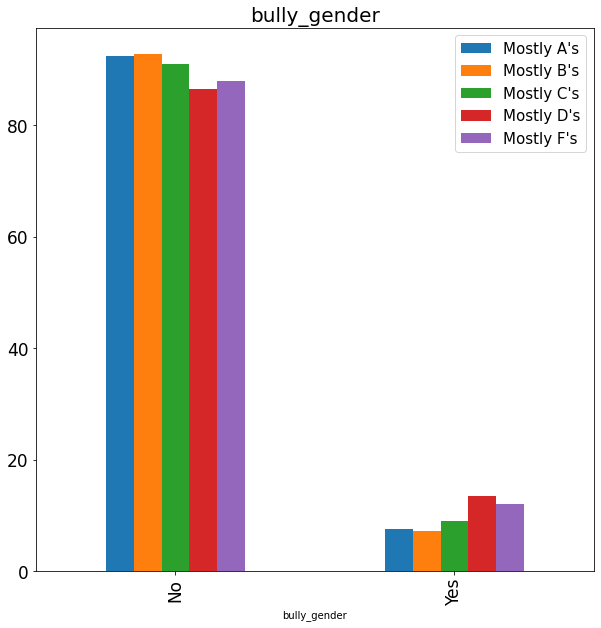

In [135]:
bully_gender.pivot("bully_gender", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('bully_gender', fontsize = 20);

Here, the trend is not obvious. that is because this column has lots of null values. 

<b> qbullyweight: </b> <br>
During the past 12 months, have you ever been the victim of teasing or name calling because of your weight, size, or physical appearance? <br>
A. Yes <br>
B. No <br>

In [136]:
df['qbullyweight'].unique()

array([nan,  1.,  2.])

In [137]:
#convert the column to categorical variables
df['qbullyweight'].replace(1.0, "Yes", inplace = True)
df['qbullyweight'].replace(2.0, "No", inplace = True)
df['qbullyweight'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [138]:
#grouping the values based on the grades
bully_weight = df.groupby('q89')['qbullyweight'].value_counts(normalize=True) * 100
bully_weight = bully_weight.to_frame()
bully_weight = bully_weight.rename(columns={'qbullyweight': 'column'}).reset_index()
bully_weight = bully_weight.rename(columns={'qbullyweight': 'bully_weight',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
bully_weight

,Grades,bully_weight,Percentage of People
0,Mostly A's,No,77.370929
1,Mostly A's,Yes,22.629071
2,Mostly B's,No,76.301075
3,Mostly B's,Yes,23.698925
4,Mostly C's,No,73.668016
5,Mostly C's,Yes,26.331984
6,Mostly D's,No,66.805411
7,Mostly D's,Yes,33.194589
8,Mostly F's,No,61.914894
9,Mostly F's,Yes,38.085106


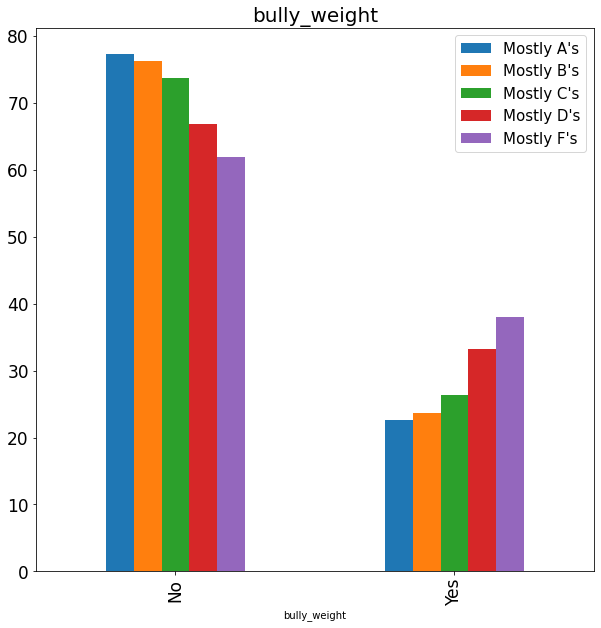

In [139]:
#Visulizing the results
bully_weight.pivot("bully_weight", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('bully_weight', fontsize = 20);

Same trend in here!

In [140]:
df['sex'].unique()

array([ 1., nan,  2.])

In [141]:
#convert the column to categorical variables
df['sex'].replace(1.0, "Male", inplace = True)
df['sex'].replace(2.0, "Female", inplace = True)
df['sex'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [142]:
#grouping the values based on the grades
gender = df.groupby('q89')['sex'].value_counts(normalize=True) * 100
gender = gender.to_frame()
gender = gender.rename(columns={'sex': 'column'}).reset_index()
gender = gender.rename(columns={'sex': 'gender',
                                        'q89':'Grades',
                                        'column': 'Percentage of People'})
gender

,Grades,gender,Percentage of People
0,Mostly A's,1.0,60.030335
1,Mostly A's,2.0,39.969665
2,Mostly B's,1.0,50.995385
3,Mostly B's,2.0,49.004615
4,Mostly C's,2.0,58.436476
5,Mostly C's,1.0,41.563524
6,Mostly D's,2.0,62.227692
7,Mostly D's,1.0,37.772308
8,Mostly F's,2.0,62.659430
9,Mostly F's,1.0,37.340570


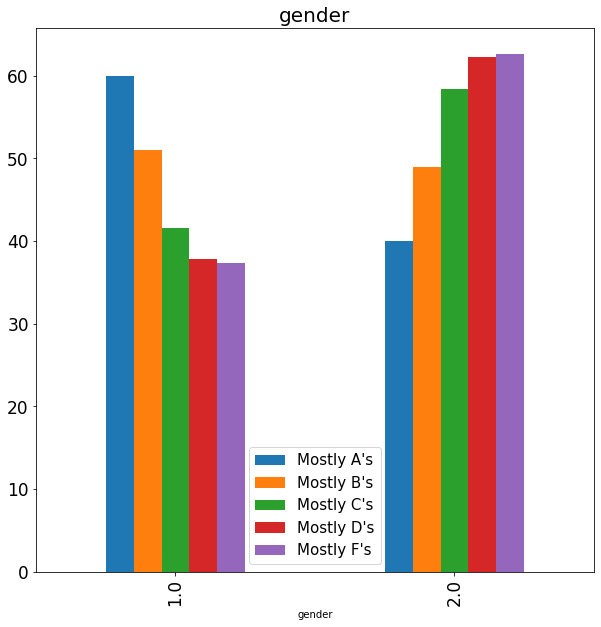

In [143]:
#Visulizing the results
gender.pivot("gender", "Grades", "Percentage of People").plot(kind='bar', figsize=(10,10))
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.title('gender', fontsize = 20);

Wow, this is shocking! why girls grade are like this!

## Feature Selection

Let's turn everything back to numerical. for q89 column (grades column), since the amount of D and F grades is less than A, B, and C. We convert D and F to C as well. 

In [144]:
#converting to numerical
df['q89'].replace('Mostly A\'s', 1.0, inplace = True)
df['q89'].replace('Mostly B\'s', 2.0, inplace = True)
df['q89'].replace('Mostly C\'s', 3.0, inplace = True)
df['q89'].replace('Mostly D\'s', 3.0, inplace = True)
df['q89'].replace('Mostly F\'s', 3.0, inplace = True)

In [145]:
#converting back to numerical
df['q30'].replace("Yes", 1.0, inplace = True)
df['q30'].replace("No", 2.0, inplace = True)

df['q19'].replace("Yes", 1.0, inplace = True)
df['q19'].replace("No", 2.0, inplace = True)

df['q23'].replace("Yes", 1.0, inplace = True)
df['q23'].replace("No", 2.0, inplace = True)

df['q24'].replace("Yes", 1.0, inplace = True)
df['q24'].replace("No", 2.0, inplace = True)

df['q25'].replace("Yes", 1.0, inplace = True)
df['q25'].replace("No", 2.0, inplace = True)

df['q26'].replace("Yes", 1.0, inplace = True)
df['q26'].replace("No", 2.0, inplace = True)

df['q27'].replace("Yes", 1.0, inplace = True)
df['q27'].replace("No", 2.0, inplace = True)

df['q29'].replace("I did not attempt suicide", 1.0, inplace = True)
df['q29'].replace("Yes", 2.0, inplace = True)
df['q29'].replace("No", 3.0, inplace = True)

df['q34'].replace("Yes", 1.0, inplace = True)
df['q34'].replace("No", 2.0, inplace = True)

df['q39'].replace("I did not use any tobacco products during the past 12 months", 1.0, inplace = True)
df['q39'].replace("Yes", 2.0, inplace = True)
df['q39'].replace("No", 3.0, inplace = True)

df['q58'].replace("Yes", 1.0, inplace = True)
df['q58'].replace("No", 2.0, inplace = True)

df['q59'].replace("Yes", 1.0, inplace = True)
df['q59'].replace("No", 2.0, inplace = True)

df['q63'].replace("I have never had sexual intercourse", 1.0, inplace = True)
df['q63'].replace("Yes", 2.0, inplace = True)
df['q63'].replace("No", 3.0, inplace = True)

df['q64'].replace("I have never had sexual intercourse", 1.0, inplace = True)
df['q64'].replace("Yes", 2.0, inplace = True)
df['q64'].replace("No", 3.0, inplace = True)

df['q85'].replace("Yes", 1.0, inplace = True)
df['q85'].replace("No", 2.0, inplace = True)
df['q85'].replace("Not Sure", 3.0, inplace = True)

df['q87'].replace("Yes", 1.0, inplace = True)
df['q87'].replace("No", 2.0, inplace = True)
df['q87'].replace("Not Sure", 3.0, inplace = True)

df['qconcentrating'].replace("Yes", 1.0, inplace = True)
df['qconcentrating'].replace("No", 2.0, inplace = True)

df['qfoodallergy'].replace("Yes", 1.0, inplace = True)
df['qfoodallergy'].replace("No", 2.0, inplace = True)
df['qfoodallergy'].replace("Not Sure", 3.0, inplace = True)

df['qtaughtbc'].replace("Yes", 1.0, inplace = True)
df['qtaughtbc'].replace("No", 2.0, inplace = True)
df['qtaughtbc'].replace("Not Sure", 3.0, inplace = True)

df['qtaughtstd'].replace("Yes", 1.0, inplace = True)
df['qtaughtstd'].replace("No", 2.0, inplace = True)
df['qtaughtstd'].replace("Not Sure", 3.0, inplace = True)

df['qtaughtsexed'].replace("Yes", 1.0, inplace = True)
df['qtaughtsexed'].replace("No", 2.0, inplace = True)
df['qtaughtsexed'].replace("Not Sure", 3.0, inplace = True)

df['qtaughtHIV'].replace("Yes", 1.0, inplace = True)
df['qtaughtHIV'].replace("No", 2.0, inplace = True)
df['qtaughtHIV'].replace("Not Sure", 3.0, inplace = True)

df['qchokeself'].replace("Yes", 1.0, inplace = True)
df['qchokeself'].replace("No", 2.0, inplace = True)

df['qbullygay'].replace("Yes", 1.0, inplace = True)
df['qbullygay'].replace("No", 2.0, inplace = True)

df['qbullygender'].replace("Yes", 1.0, inplace = True)
df['qbullygender'].replace("No", 2.0, inplace = True)

df['qbullyweight'].replace("Yes", 1.0, inplace = True)
df['qbullyweight'].replace("No", 2.0, inplace = True)

df['sex'].replace("Male", 1.0, inplace = True)
df['sex'].replace("Female", 2.0, inplace = True)

In [146]:
df = df[df['q89'].notnull()]
df['q89'].isnull().sum()

0

In [147]:
#dropping columns with more than 30 percent null values
df = df.dropna(thresh=0.7*len(df), axis=1)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434101 entries, 89738 to 962924
Data columns (total 70 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sitecode     434101 non-null  object 
 1   sitename     434101 non-null  object 
 2   sitetype     434101 non-null  object 
 3   sitetypenum  434101 non-null  int64  
 4   year         434101 non-null  int64  
 5   survyear     434101 non-null  int64  
 6   weight       434101 non-null  float64
 7   stratum      434101 non-null  int64  
 8   PSU          434101 non-null  int64  
 9   record       434101 non-null  int64  
 10  age          432617 non-null  float64
 11  sex          431752 non-null  float64
 12  grade        429737 non-null  float64
 13  race4        425852 non-null  float64
 14  race7        425852 non-null  float64
 15  stheight     401404 non-null  float64
 16  stweight     401404 non-null  float64
 17  bmi          405353 non-null  float64
 18  bmipct       402505 

In [149]:
#the percentage of null values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(inplace=True)
percent_missing

sitecode     0.000000
record       0.000000
PSU          0.000000
stratum      0.000000
weight       0.000000
              ...    
q38         24.727195
q51         26.158889
q30         26.866559
q55         27.293188
q81         28.419193
Length: 70, dtype: float64

In [150]:
#finding the correlation
cor = df.corr()

In [151]:
#correlation to output
cor_target = abs(cor['q89'])

In [152]:
#the most correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

sex    0.150335
q8     0.221327
q17    0.181081
q30    0.262309
q32    0.199628
q33    0.207473
q42    0.169829
q46    0.249285
q47    0.201680
q48    0.202871
q59    0.220680
q60    0.155689
q61    0.224286
q62    0.199607
q63    0.193319
q64    0.202457
q65    0.188745
q89    1.000000
Name: q89, dtype: float64

In [153]:
#let's make a new dataset from the most important features
Grading = df[['sex','q8', 'q17','q30','q32','q33', 'q42','q46', 'q47', 'q48', 'q59','q60', 'q61', 'q62', 
              'q63', 'q64', 'q65', 'q89']]
Grading = Grading.dropna( how = 'any')

In [154]:
Grading.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194557 entries, 91318 to 962924
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   sex     194557 non-null  float64
 1   q8      194557 non-null  float64
 2   q17     194557 non-null  float64
 3   q30     194557 non-null  float64
 4   q32     194557 non-null  float64
 5   q33     194557 non-null  float64
 6   q42     194557 non-null  float64
 7   q46     194557 non-null  float64
 8   q47     194557 non-null  float64
 9   q48     194557 non-null  float64
 10  q59     194557 non-null  float64
 11  q60     194557 non-null  float64
 12  q61     194557 non-null  float64
 13  q62     194557 non-null  float64
 14  q63     194557 non-null  float64
 15  q64     194557 non-null  float64
 16  q65     194557 non-null  float64
 17  q89     194557 non-null  float64
dtypes: float64(18)
memory usage: 28.2 MB


In [155]:
Grading['q8'].unique()

array([4., 1., 5., 3., 2.])

## Machine Learning Models

Hypothesis: we assumed the poor performance of students at school has deeper cause and can give us some hints about their state of well being. In this section we aim to predict the students grades based on their answer to specific questions. 

### 1. Logistic Regression

In [156]:
#importing the libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [157]:
#defining the input and output
X = Grading.drop(["q89"], axis = 1)
y = Grading["q89"]

In [158]:
#splitting the train, and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [159]:
#logistic regression modeling
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'sag', class_weight='balanced', max_iter = 1000)
log_model = log.fit(X_train,y_train)
log_model

LogisticRegression(class_weight='balanced', max_iter=1000, solver='sag')

In [160]:
#predicting the outcome
y_pred = log_model.predict(X_test)

In [161]:
#calculating the precision, recall, etc.
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.51      0.68      0.58     21765
         2.0       0.44      0.20      0.27     22459
         3.0       0.42      0.56      0.48     14144

    accuracy                           0.46     58368
   macro avg       0.45      0.48      0.44     58368
weighted avg       0.46      0.46      0.44     58368



Confusion Matrix
[[14813  3240  3712]
 [10709  4400  7350]
 [ 3806  2443  7895]]


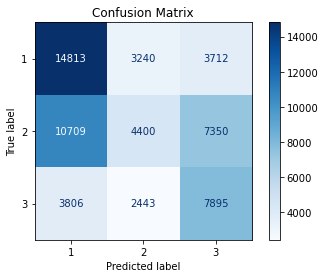

In [162]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
labels = [1, 2, 3]
disp = plot_confusion_matrix(log_model, X_test, y_test,
                                 display_labels= labels,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print('Confusion Matrix')
print(disp.confusion_matrix)

plt.show()

In [163]:
#cross validation accuracy
accuracy_score(y_test, log_model.predict(X_test))
cross_val_score(log_model, X_test, y_test, cv = 5).mean()

0.46467232895911037

As you may see, the accuracy is not very good but we need to note that our data had too many null values and we lost a huge portion of it due to having null values. 

### 2. Naive Bayes (NB)

In [164]:
# Naive Bayes Modelling
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [165]:
#predicting the outcome
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.45105194627192985

In [166]:
#calculating the cross validation score
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.45082908622325285

In [167]:
#calculating the precision, recall, etc.
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.47      0.75      0.57     21765
         2.0       0.43      0.17      0.25     22459
         3.0       0.43      0.44      0.43     14144

    accuracy                           0.45     58368
   macro avg       0.44      0.45      0.42     58368
weighted avg       0.44      0.45      0.41     58368



Confusion Matrix
[[16285  2726  2754]
 [13154  3868  5437]
 [ 5575  2395  6174]]


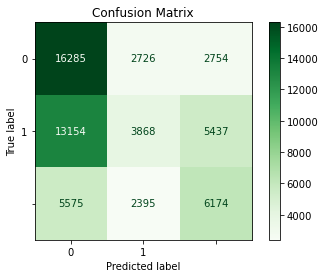

In [168]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
labels = [0, 1]
disp = plot_confusion_matrix(nb_model, X_test, y_test,
                                 display_labels= labels,
                                 cmap=plt.cm.Greens)
disp.ax_.set_title('Confusion Matrix')
print('Confusion Matrix')
print(disp.confusion_matrix)

plt.show()

Naive Base accuracy is not better than logistic regression.

### 3. K-nearest Neighbors (KNN)

In [169]:
#KNN modeling
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 9)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=9)

In [170]:
##predicting the outcome
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.40707236842105265

<b> Note </b> <br>
The below code is the grid search algorithm to find the best parameters for knn algorithms, but it takes too long. So, I commented to code so you don't have to wait forever for it to see the result. The best results came with n = 9. 

In [171]:
#finding the best k through Grid Search

#knn_params = {"n_neighbors": np.arange(1,10)}
#knn = KNeighborsClassifier()
#knn_cv = GridSearchCV(knn, knn_params, cv=5)
#knn_cv.fit(X_train, y_train)

In [172]:
#best gridsearch results

#print("Best KNN score:" + str(knn_cv.best_score_))
#print("Best KNN parameter: " + str(knn_cv.best_params_))

In [173]:
#tuned knn modelling 

#knn = KNeighborsClassifier(n_neighbors = 9)
#knn_tuned = knn.fit(X_train, y_train)

In [174]:
#predicting the tuned outcome

#y_pred = knn_tuned.predict(X_test)
#accuracy_score(y_test, y_pred)

In [175]:
#calculating the precision, recall, etc.
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.42      0.46      0.44     21765
         2.0       0.38      0.43      0.40     22459
         3.0       0.44      0.30      0.35     14144

    accuracy                           0.41     58368
   macro avg       0.41      0.39      0.40     58368
weighted avg       0.41      0.41      0.40     58368



Confusion Matrix
[[9989 9975 1801]
 [9381 9596 3482]
 [4378 5591 4175]]


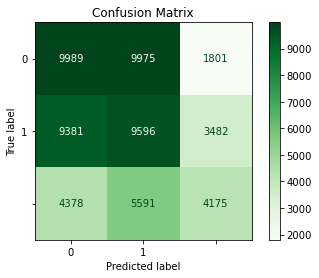

In [177]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
labels = [0, 1]
disp = plot_confusion_matrix(knn_model, X_test, y_test,
                                 display_labels= labels,
                                 cmap=plt.cm.Greens)
disp.ax_.set_title('Confusion Matrix')
print('Confusion Matrix')
print(disp.confusion_matrix)

plt.show()

### 4. Random Forest (RF)

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.4673622532894737

In [179]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.50      0.67      0.57     21765
         2.0       0.43      0.35      0.38     22459
         3.0       0.46      0.35      0.40     14144

    accuracy                           0.47     58368
   macro avg       0.46      0.45      0.45     58368
weighted avg       0.46      0.47      0.46     58368



## Evaluation of Models

the below cells takes some time to run. Please be patient and avoid it.

In [182]:
models = [
    knn_model,
    log_model,
    nb_model,
    rf_model,
]

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(name + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 40.7072%
----------------------------
LogisticRegression:
Accuracy: 46.4433%
----------------------------
GaussianNB:
Accuracy: 45.1052%
----------------------------
RandomForestClassifier:
Accuracy: 46.7362%


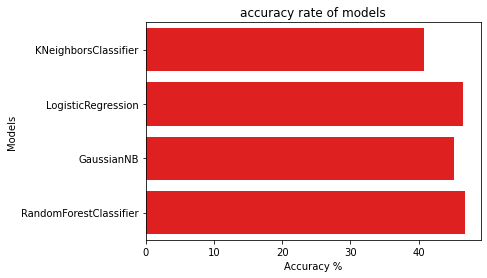

In [183]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[name, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('accuracy rate of models'); 

Note: logistic regression and random forest gave us the highest accuracy value. 

### Limitation of our work

The accurcay of our models were not good at all which I believe was due to huge portion of null values that made us to drop the data.

This work can be continued by finetuning the models and better strategies to handle the null values. 